## DISASTER TWEET ANALYSER


**Libraries used**



In [74]:
import pandas as pd
import numpy as np
import pycountry
from geopy.geocoders import Nominatim
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Load Data**

In [95]:
data=pd.read_csv('C:/Users/gurud/Downloads/archive/tweets.csv')
data

id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  Media should have warned us well in advance. T...       0  
11366  i feel directly attacked 💀 i consider moonbin ...       0  
11367  i feel directly attacked 💀 i consider moonbin ...       0  
11368  ok who remember "outcast" nd the "dora" au?? T...       0  
11369     Jake Corway wrecked while running 14th at IRP.       1  

[11370 rows x 5 columns]

**Filling null values**

In [ ]:
data['location'].fillna('Unknown', inplace=True)
data['keyword'].fillna('no_keyword', inplace=True)

In [28]:
data


id  keyword                 location  \
0          0   ablaze                  Unknown   
1          1   ablaze                  Unknown   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                  Unknown   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                  Unknown   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  Media should have warned us well in advance. T...       0  
11366  i feel directly attacked 💀 i consider moonbin ...       0  
11367  i feel directly attacked 💀 i consider moonbin ...       0  
11368  ok who remember "outcast" nd the "dora" au?? T...       0  
11369     Jake Corway wrecked while running 14th at IRP.       1  

[11370 rows x 5 columns]

**Null values**

In [35]:
data.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [98]:
data[:498]

id keyword        location  \
0      0  ablaze             NaN   
1      1  ablaze             NaN   
2      2  ablaze   New York City   
3      3  ablaze  Morgantown, WV   
4      4  ablaze             NaN   
..   ...     ...             ...   
493  493   arson             NaN   
494  494   arson         chicago   
495  495   arson             NaN   
496  496   arson             NaN   
497  497   arson           日本 東京   

                                                  text  target  
0    Communal violence in Bhainsa, Telangana. "Ston...       1  
1    Telangana: Section 144 has been imposed in Bha...       1  
2    Arsonist sets cars ablaze at dealership https:...       1  
3    Arsonist sets cars ablaze at dealership https:...       1  
4    "Lord Jesus, your love brings freedom and pard...       0  
..                                                 ...     ...  
493  ...the lack of decent land management / strate...       0  
494  Ladies don’t ever go to jail for arson over a ...       0  
495  it's not just arson that's starting the fires ...       0  
496  John Brennan Sacked corrupt Ex CIA Director wh...       0  
497  As part of our analysis of misinformation prop...       0  

[498 rows x 5 columns]

**Remove non-english words**

In [100]:
data.loc[data['location'].str.contains(r'[\u3400-\u9FFF]+', na=False), 'location'] = "Unknown"
data.reset_index(drop=True, inplace=True) 
data[:498]

id keyword        location  \
0      0  ablaze             NaN   
1      1  ablaze             NaN   
2      2  ablaze   New York City   
3      3  ablaze  Morgantown, WV   
4      4  ablaze             NaN   
..   ...     ...             ...   
493  493   arson             NaN   
494  494   arson         chicago   
495  495   arson             NaN   
496  496   arson             NaN   
497  497   arson         Unknown   

                                                  text  target  
0    Communal violence in Bhainsa, Telangana. "Ston...       1  
1    Telangana: Section 144 has been imposed in Bha...       1  
2    Arsonist sets cars ablaze at dealership https:...       1  
3    Arsonist sets cars ablaze at dealership https:...       1  
4    "Lord Jesus, your love brings freedom and pard...       0  
..                                                 ...     ...  
493  ...the lack of decent land management / strate...       0  
494  Ladies don’t ever go to jail for arson over a ...       0  
495  it's not just arson that's starting the fires ...       0  
496  John Brennan Sacked corrupt Ex CIA Director wh...       0  
497  As part of our analysis of misinformation prop...       0  

[498 rows x 5 columns]

**Creating new_location**

In [103]:
import pandas as pd
import numpy as np
import pycountry

# Function to check if a string is a valid country
def is_country(name):
    try:
        return pycountry.countries.lookup(name) is not None
    except LookupError:
        return False

# Function to check if a string contains any numeric characters
def is_numeric(value):
    return any(char.isdigit() for char in value)

# Function to determine the new location based on given criteria
def get_new_location(location):
    if isinstance(location, str) and not is_numeric(location):
        parts = location.split(',')
        if len(parts) >= 1:
            # Take the first part as the new location
            return parts[0].strip()
    return "Unknown"

# Apply the function and create the new 'new_location' column
data['new_location'] = data['location'].apply(get_new_location)



# Display the resulting DataFrame
data[:500]


id keyword        location  \
0      0  ablaze             NaN   
1      1  ablaze             NaN   
2      2  ablaze   New York City   
3      3  ablaze  Morgantown, WV   
4      4  ablaze             NaN   
..   ...     ...             ...   
495  495   arson             NaN   
496  496   arson             NaN   
497  497   arson         Unknown   
498  498   arson       Australia   
499  499   arson     Oregon, USA   

                                                  text  target   new_location  
0    Communal violence in Bhainsa, Telangana. "Ston...       1        Unknown  
1    Telangana: Section 144 has been imposed in Bha...       1        Unknown  
2    Arsonist sets cars ablaze at dealership https:...       1  New York City  
3    Arsonist sets cars ablaze at dealership https:...       1     Morgantown  
4    "Lord Jesus, your love brings freedom and pard...       0        Unknown  
..                                                 ...     ...            ...  
495  it's not just arson that's starting the fires ...       0        Unknown  
496  John Brennan Sacked corrupt Ex CIA Director wh...       0        Unknown  
497  As part of our analysis of misinformation prop...       0        Unknown  
498  TASA member et al. was in the recently on, ' #...       0      Australia  
499  HE HAS A FUCKING HEART AND A LITTLE RAINBOW EM...       0         Oregon  

[500 rows x 6 columns]

**Removing urls,emojis and other numeric words**

In [107]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Stopwords in English
stop_words = set(stopwords.words('english'))

# Function to extract URLs from text
def extract_urls(text):
    # Find all URLs in the text
    urls = re.findall(r'http\S+|www\S+', text)
    # If no URLs found, return NaN
    return urls if urls else np.nan

# Apply the function to extract URLs into a new column 'urls'
data['urls'] = data['text'].apply(extract_urls)

# Function to remove URLs from text
def remove_urls(text):
    # Remove URLs from the text
    return re.sub(r'http\S+|www\S+', '', text).strip()

# Function to clean and preprocess text for advanced preprocessing
def advanced_text_preprocessing(text):
    # Remove URLs
    text = remove_urls(text)
    # Remove mentions (@user) and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower().strip()
    
    # Tokenization (split the text into words)
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization (reduce words to their root form)
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into one string
    return ' '.join(words)

# Apply advanced text preprocessing to the 'text' column
data['processed_text'] = data['text'].apply(advanced_text_preprocessing)

# Drop unnecessary columns


# Encode 'keyword' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['keyword_encoded'] = le.fit_transform(data['keyword'])

# Display the processed data
print("\nAdvanced Preprocessed Data with URLs:")
data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gurud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gurud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gurud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Advanced Preprocessed Data with URLs:


id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  \
0      Communal violence in Bhainsa, Telangana. "Ston...       1   
1      Telangana: Section 144 has been imposed in Bha...       1   
2      Arsonist sets cars ablaze at dealership https:...       1   
3      Arsonist sets cars ablaze at dealership https:...       1   
4      "Lord Jesus, your love brings freedom and pard...       0   
...                                                  ...     ...   
11365  Media should have warned us well in advance. T...       0   
11366  i feel directly attacked 💀 i consider moonbin ...       0   
11367  i feel directly attacked 💀 i consider moonbin ...       0   
11368  ok who remember "outcast" nd the "dora" au?? T...       0   
11369     Jake Corway wrecked while running 14th at IRP.       1   

                  new_location  \
0                      Unknown   
1                      Unknown   
2                New York City   
3                   Morgantown   
4                      Unknown   
...                        ...   
11365  Blue State in a red sea   
11366               arohaonces   
11367                       🇵🇭   
11368           auroraborealis   
11369                  Unknown   

                                                    urls  \
0                                                    NaN   
1                                                    NaN   
2                              [https://t.co/gOQvyJbpVI]   
3      [https://t.co/0gL7NUCPlb, https://t.co/u1CcBhO...   
4                              [https://t.co/VlTznnPNi8]   
...                                                  ...   
11365                                                NaN   
11366                                                NaN   
11367                          [https://t.co/psLBecS7hI]   
11368                                                NaN   
11369                                                NaN   

                                          processed_text  keyword_encoded  
0      communal violence bhainsa telangana stone pelt...                0  
1      telangana section imposed bhainsa january clas...                0  
2                     arsonist set car ablaze dealership                0  
3                     arsonist set car ablaze dealership                0  
4      lord jesus love brings freedom pardon fill hol...                0  
...                                                  ...              ...  
11365  medium warned u well advance wrecked whole nig...              218  
11366  feel directly attacked consider moonbin amp ji...              218  
11367  feel directly attacked consider moonbin amp ji...              218  
11368  ok remember outcast nd dora au au wrecked nerv...              218  
11369                 jake corway wrecked running th irp              218  

[11370 rows x 9 columns]

Text(0, 0.5, 'Number of Tweets')

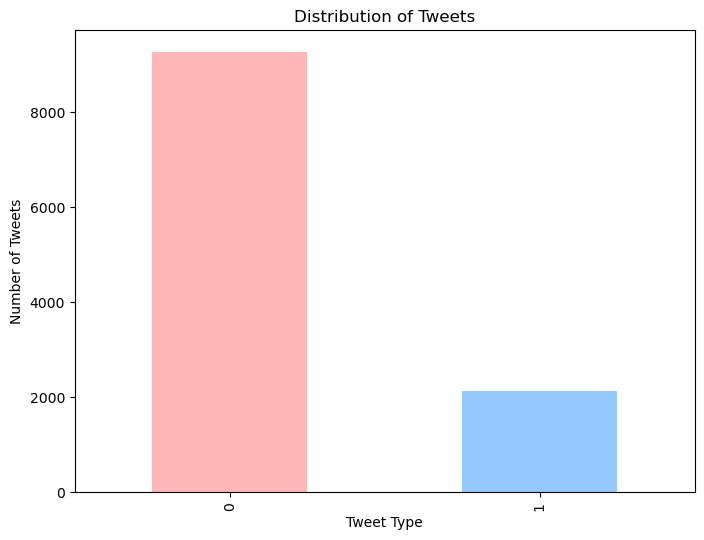

In [109]:
import matplotlib.pyplot as plt
target_counts = data['target'].value_counts()
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['#ff9999', '#66b3ff'], alpha=0.7)
plt.title('Distribution of Tweets')
plt.xlabel('Tweet Type')
plt.ylabel('Number of Tweets')